## Importing Needed Libraries

In [ ]:
                        ********** DIGITAL CURRENCY STOCK PREDICTION ************
#by Mouhamed N.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout

from sklearn.preprocessing import MinMaxScaler

## Reading The Data

In [3]:
data_dir = ('C:/Users/MI/Downloads/dc.csv')
df = pd.read_csv(data_dir)

## Data Exploration and Preprocessing

In [4]:
df.head()

,Unnamed: 0,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
0,2021-01-30,128437.248512,34246.28,131012.723200,34933.00,123106.880000,32825.00,128333.212416,34218.54,43072
1,2021-01-29,125144.022272,33368.18,144510.037760,38531.90,119695.516160,31915.40,128459.450880,34252.20,231827
2,2021-01-28,113870.357376,30362.19,126703.438592,33783.98,111919.811840,29842.10,125131.570944,33364.86,92621
3,2021-01-27,121753.023104,32464.01,122102.860416,32557.29,109668.146688,29241.72,113885.208960,30366.15,95911
4,2021-01-26,120966.114176,32254.19,123470.218752,32921.88,115652.472448,30837.37,121767.124608,32467.77,84972


In [5]:
df.tail()

,Unnamed: 0,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
995,2018-05-11,33761.888384,9002.21,33816.606720,9016.80,31282.086400,8341.00,31503.360000,8400.00,48227
996,2018-05-10,34916.224000,9310.00,35235.458048,9395.12,33641.088000,8970.00,33761.850880,9002.20,25055
997,2018-05-09,34421.171200,9178.00,35216.256000,9390.00,33622.336000,8965.00,34916.224000,9310.00,25673
998,2018-05-08,35122.496000,9365.00,35537.665280,9475.70,33980.649216,9060.54,34457.025024,9187.56,25533
999,2018-05-07,36232.689408,9661.02,36340.138368,9689.67,34432.422400,9181.00,35122.496000,9365.00,33787


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   object 
 1   open_SAR    1000 non-null   float64
 2   open_USD    1000 non-null   float64
 3   high_SAR    1000 non-null   float64
 4   high_USD    1000 non-null   float64
 5   low_SAR     1000 non-null   float64
 6   low_USD     1000 non-null   float64
 7   close_SAR   1000 non-null   float64
 8   close_USD   1000 non-null   float64
 9   volume      1000 non-null   int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 78.2+ KB


In [7]:
df.describe()

,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,34825.322255,9285.762120,35789.618165,9542.880270,33796.329057,9011.393200,34917.483572,9310.335850,53100.498000
std,21728.028028,5793.522832,22785.946842,6075.604427,20565.410145,5483.524463,21928.280072,5846.917681,35329.832031
min,12045.197184,3211.710000,12288.185600,3276.500000,11837.237504,3156.260000,12045.234688,3211.720000,5743.000000
25%,24254.558752,6467.192500,24686.089152,6582.255000,23721.336256,6325.015000,24252.946080,6466.762500,30045.750000
50%,30714.632128,8189.695000,31321.953152,8351.630000,30010.869568,8002.045000,30713.263232,8189.330000,43795.500000
75%,38317.311744,10216.860000,39077.527200,10419.562500,37158.878816,9907.977500,38329.725568,10220.170000,64909.250000
max,152217.334784,40586.960000,157329.280000,41950.000000,145215.488000,38720.000000,152201.770624,40582.810000,402201.000000


### Resort Data

In [8]:
df.sort_values(by='Unnamed: 0', ascending=True, inplace=True)

### Set Date column as an index

In [9]:
df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'])
df.set_index('Unnamed: 0', inplace= True)

In [10]:
df.head()

,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
Unnamed: 0,,,,,,,,,
2018-05-07,36232.689408,9661.02,36340.138368,9689.67,34432.422400,9181.00,35122.496000,9365.00,33787
2018-05-08,35122.496000,9365.00,35537.665280,9475.70,33980.649216,9060.54,34457.025024,9187.56,25533
2018-05-09,34421.171200,9178.00,35216.256000,9390.00,33622.336000,8965.00,34916.224000,9310.00,25673
2018-05-10,34916.224000,9310.00,35235.458048,9395.12,33641.088000,8970.00,33761.850880,9002.20,25055
2018-05-11,33761.888384,9002.21,33816.606720,9016.80,31282.086400,8341.00,31503.360000,8400.00,48227


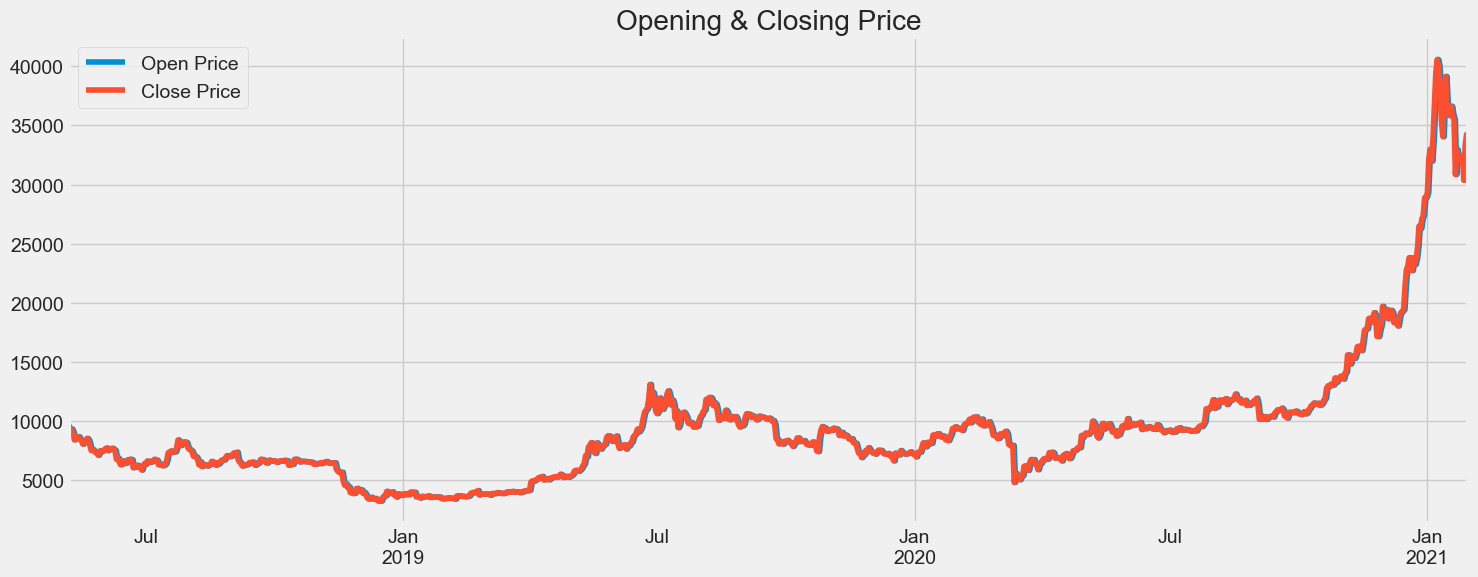

In [11]:
plt.figure(figsize=(15, 6))
df['open_USD'].plot()
df['close_USD'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("Opening & Closing Price")
plt.legend(['Open Price', 'Close Price'])
plt.tight_layout()
plt.show()

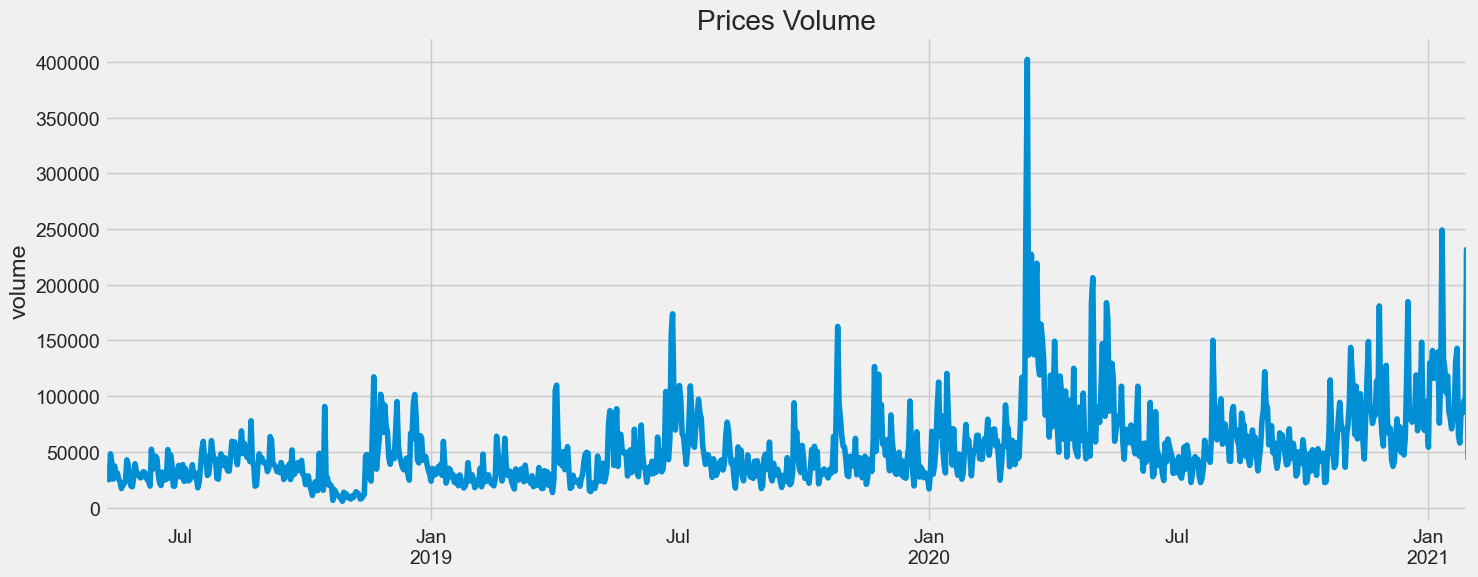

In [12]:
plt.figure(figsize=(15, 6))
df['volume'].plot()
plt.ylabel('volume')
plt.xlabel(None)
plt.title("Prices Volume")
plt.tight_layout()
plt.show()

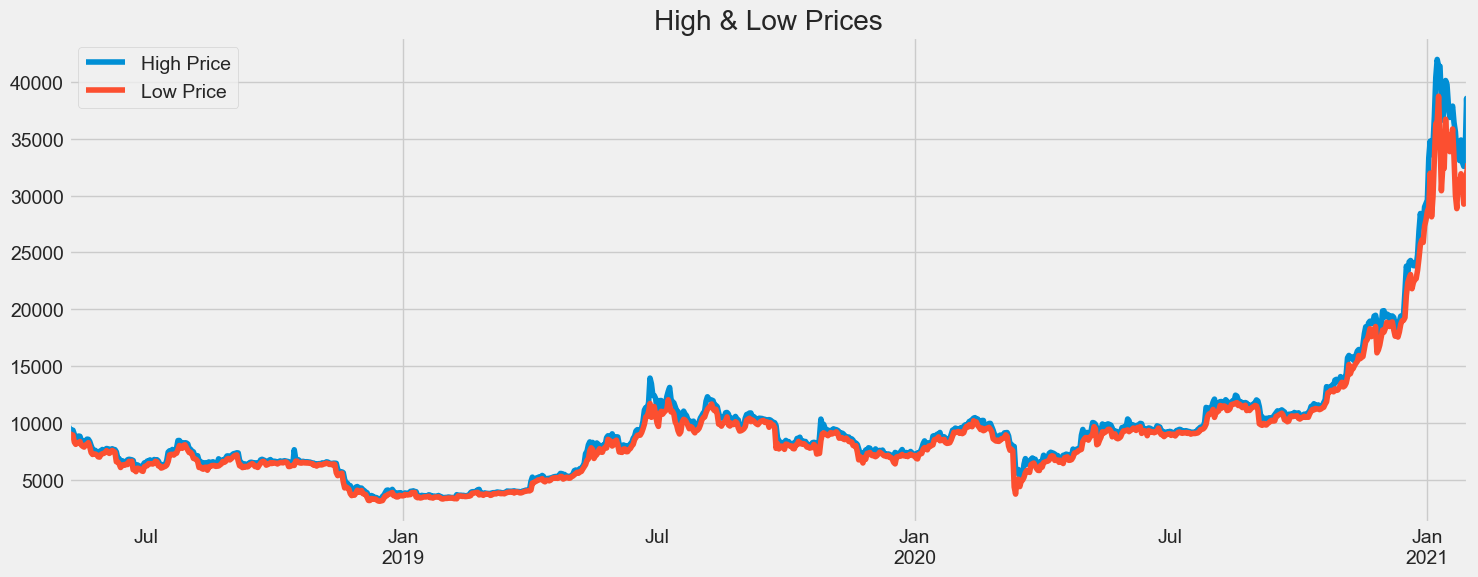

In [13]:
plt.figure(figsize=(15, 6))
df['high_USD'].plot()
df['low_USD'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("High & Low Prices")
plt.legend(['High Price', 'Low Price'])
plt.tight_layout()
plt.show()

### Choosing Prediction Column

In [14]:
n_cols = 1
dataset = df["close_USD"]
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(1000, 1)

### Normalizing Data

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data))

### Splitting the Data

In [16]:
# 75% to Train , 25% to Test
train_size = int(len(data) * 0.75)
test_size = len(data) - train_size
print("Train Size :",train_size,"Test Size :",test_size)

Train Size : 750 Test Size : 250


In [17]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(750, 1)

### Creating training set

In [18]:
# Creating a Training set with 60 time-steps
x_train = []
y_train = []
time_steps = 60
n_cols = 1

for i in range(time_steps, len(train_data)):
    x_train.append(train_data[i-time_steps:i, :n_cols])
    y_train.append(train_data[i, :n_cols])
    if i<=time_steps:
        print('X_train: ', x_train)
        print('y_train:' , y_train)

X_train:  [array([[0.16465348],
       [0.15990542],
       [0.16318175],
       [0.15494544],
       [0.13883138],
       [0.14059585],
       [0.14631604],
       [0.145878  ],
       [0.14049042],
       [0.13695827],
       [0.12923733],
       [0.13454491],
       [0.1343758 ],
       [0.14222919],
       [0.13832939],
       [0.12751541],
       [0.11480077],
       [0.11675576],
       [0.11359797],
       [0.11030559],
       [0.11044018],
       [0.10401837],
       [0.11371277],
       [0.11142945],
       [0.11434748],
       [0.11531079],
       [0.11849561],
       [0.1204819 ],
       [0.11440073],
       [0.11809342],
       [0.11899894],
       [0.11986164],
       [0.11751651],
       [0.1145273 ],
       [0.09508072],
       [0.09794416],
       [0.0887927 ],
       [0.08244501],
       [0.09162858],
       [0.08501705],
       [0.08756127],
       [0.08664157],
       [0.09367508],
       [0.0944444 ],
       [0.0949876 ],
       [0.0938458 ],
       [0.07581475],
  

In [19]:
# Convert to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
# Reshaping the input to (n_samples, time_steps, n_feature)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))

In [21]:
x_train.shape , y_train.shape

((690, 60, 1), (690, 1))

## LSTM Model

### Model Dtructure

In [22]:
model = Sequential([
    LSTM(50, return_sequences= True, input_shape= (x_train.shape[1], n_cols)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(n_cols)
])

model.compile(optimizer= 'adam', loss= 'mse' , metrics= "mean_absolute_error")

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 42,465
Trainable params: 42,465
Non-trainable params: 0
_________________________________________________________________


### Model Training

In [24]:
# Fitting the LSTM to the Training set
history = model.fit(x_train, y_train, epochs= 100, batch_size= 32)

Epoch 1/100
22/22 [==============================] - 37s 266ms/step - loss: 0.0026 - mean_absolute_error: 0.0395
Epoch 2/100
22/22 [==============================] - 4s 165ms/step - loss: 5.5812e-04 - mean_absolute_error: 0.0172
Epoch 3/100
22/22 [==============================] - 4s 195ms/step - loss: 3.8176e-04 - mean_absolute_error: 0.0141
Epoch 4/100
22/22 [==============================] - 7s 326ms/step - loss: 3.1234e-04 - mean_absolute_error: 0.0123
Epoch 5/100
22/22 [==============================] - 4s 185ms/step - loss: 2.8692e-04 - mean_absolute_error: 0.0118
Epoch 6/100
22/22 [==============================] - 12s 550ms/step - loss: 2.7248e-04 - mean_absolute_error: 0.0115
Epoch 7/100
22/22 [==============================] - 5s 220ms/step - loss: 2.6223e-04 - mean_absolute_error: 0.0117
Epoch 8/100
22/22 [==============================] - 4s 185ms/step - loss: 2.3683e-04 - mean_absolute_error: 0.0107
Epoch 9/100
22/22 [==============================] - 3s 143ms/step - loss:

22/22 [==============================] - 4s 199ms/step - loss: 7.9860e-05 - mean_absolute_error: 0.0060
Epoch 72/100
22/22 [==============================] - 4s 177ms/step - loss: 8.1627e-05 - mean_absolute_error: 0.0060
Epoch 73/100
22/22 [==============================] - 4s 163ms/step - loss: 7.9355e-05 - mean_absolute_error: 0.0059
Epoch 74/100
22/22 [==============================] - 4s 165ms/step - loss: 8.0215e-05 - mean_absolute_error: 0.0060
Epoch 75/100
22/22 [==============================] - 5s 222ms/step - loss: 9.4144e-05 - mean_absolute_error: 0.0068
Epoch 76/100
22/22 [==============================] - 5s 212ms/step - loss: 8.9623e-05 - mean_absolute_error: 0.0067
Epoch 77/100
22/22 [==============================] - 5s 210ms/step - loss: 8.7008e-05 - mean_absolute_error: 0.0066
Epoch 78/100
22/22 [==============================] - 5s 215ms/step - loss: 8.9309e-05 - mean_absolute_error: 0.0066
Epoch 79/100
22/22 [==============================] - 4s 196ms/step - loss: 8

### Model Evaluation

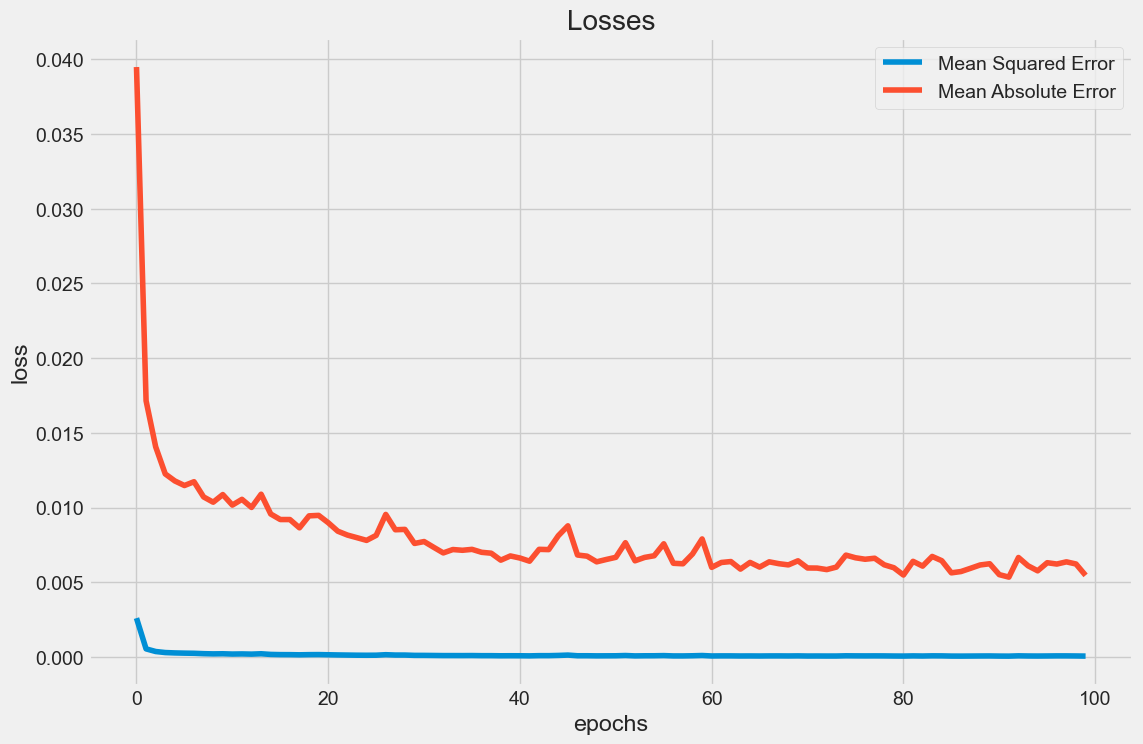

In [25]:
plt.figure(figsize=(12, 8))
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

## Predection

### Creating testing set

In [26]:
# Creating a testing set with 60 time-steps and 1 output
time_steps = 60
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 1

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [27]:
x_test.shape , y_test.shape

((250, 60, 1), (250, 1))

In [28]:
# Get Prediction
predictions = model.predict(x_test)

8/8 [==============================] - 9s 104ms/step


In [29]:
#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

(250, 1)

### Root mean square error

In [32]:
#inverse y_test scaling
y_test = scaler.inverse_transform(y_test)

RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

21846473107785.47

In [33]:
preds_acts = pd.DataFrame(data={'Predictions':predictions.flatten(), 'Actuals':y_test.flatten()})
preds_acts

,Predictions,Actuals
0,8993.781250,1.234770e+13
1,8991.159180,1.285451e+13
2,9286.022461,1.337379e+13
3,9676.174805,1.316595e+13
4,9640.221680,1.354394e+13
...,...,...
245,30308.550781,4.534455e+13
246,30506.683594,4.240944e+13
247,28317.673828,4.659743e+13
248,31303.330078,4.783669e+13


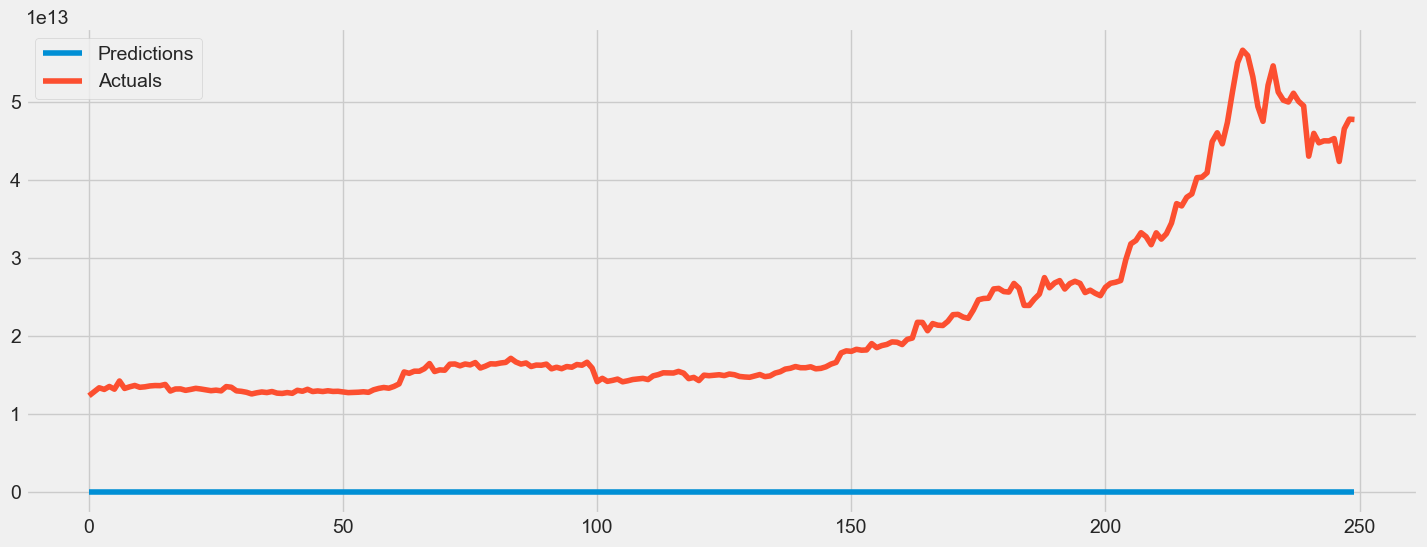

In [34]:
plt.figure(figsize = (16, 6))
plt.plot(preds_acts['Predictions'])
plt.plot(preds_acts['Actuals'])
plt.legend(['Predictions', 'Actuals'])
plt.show()

### Visualize Predictions with The Data
for one feature

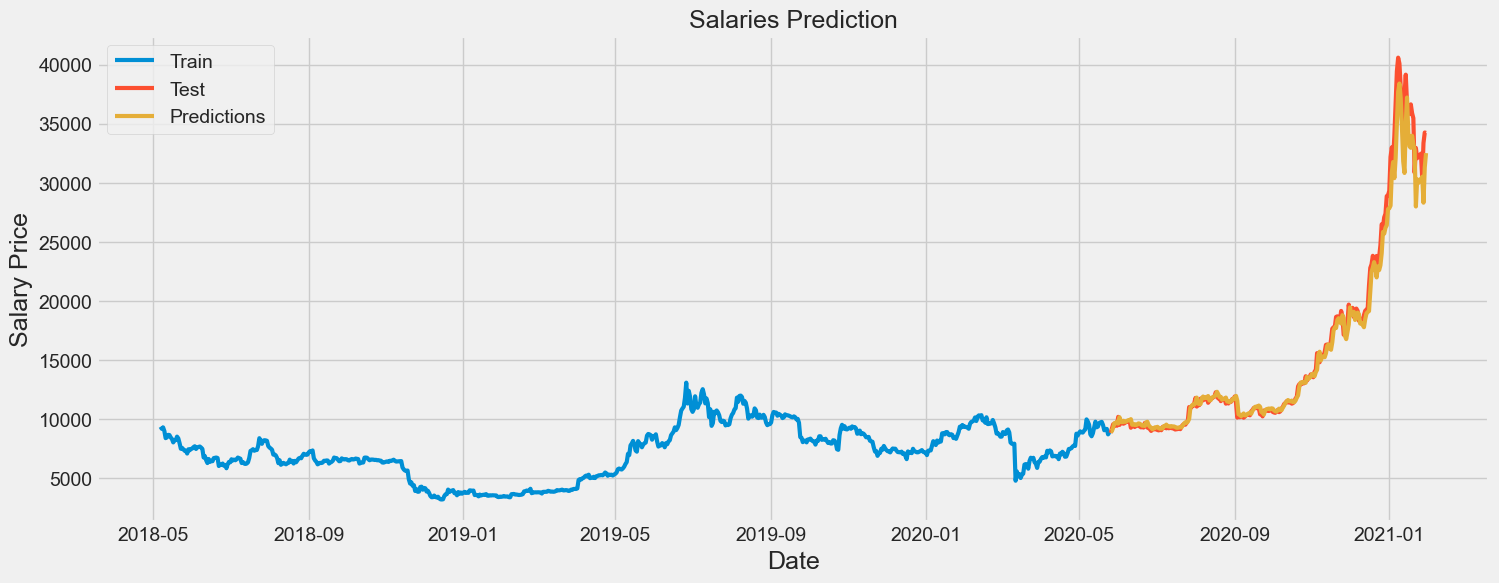

In [35]:
train = dataset.iloc[:train_size , 0:1]
test = dataset.iloc[train_size: , 0:1]
test['Predictions'] = predictions

plt.figure(figsize= (16, 6))
plt.title('Salaries Prediction', fontsize= 18)
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Salary Price', fontsize= 18)
plt.plot(train['close_USD'], linewidth= 3)
plt.plot(test['close_USD'], linewidth= 3)
plt.plot(test["Predictions"], linewidth= 3)
plt.legend(['Train', 'Test', 'Predictions'])

# Multivariate Predection

In [36]:
df.head()

,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
Unnamed: 0,,,,,,,,,
2018-05-07,36232.689408,9661.02,36340.138368,9689.67,34432.422400,9181.00,35122.496000,9365.00,33787
2018-05-08,35122.496000,9365.00,35537.665280,9475.70,33980.649216,9060.54,34457.025024,9187.56,25533
2018-05-09,34421.171200,9178.00,35216.256000,9390.00,33622.336000,8965.00,34916.224000,9310.00,25673
2018-05-10,34916.224000,9310.00,35235.458048,9395.12,33641.088000,8970.00,33761.850880,9002.20,25055
2018-05-11,33761.888384,9002.21,33816.606720,9016.80,31282.086400,8341.00,31503.360000,8400.00,48227


### Chose Columns

In [37]:
n_cols = 4
cols = list(df.loc[:, ['open_USD', 'high_USD', 'low_USD', 'close_USD', 'volume']])
dataset = df[cols]
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(1000, 5)

### Data Normalization

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data))

In [39]:
train_size = int(len(data) * 0.75)
test_size = len(data) - train_size
print("Train Size :",train_size,"Test Size :",test_size)

Train Size : 750 Test Size : 250


In [40]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(750, 5)

In [41]:
# Creating a Training set with 60 time-steps
x_train = []
y_train = []
time_steps = 60
n_cols = 5

for i in range(time_steps, len(train_data)):
    x_train.append(train_data[i-time_steps:i, :n_cols])
    y_train.append(train_data[i, :n_cols])
    if i<=time_steps:
        print('X_train: ', x_train)
        print('y_train:' , y_train)

X_train:  [array([[0.17255564, 0.16582854, 0.16940682, 0.16465348, 0.07073637],
       [0.16463542, 0.16029581, 0.16601966, 0.15990542, 0.04991702],
       [0.15963211, 0.15807982, 0.16333322, 0.16318175, 0.05027014],
       [0.16316386, 0.15821221, 0.16347381, 0.15494544, 0.04871134],
       [0.15492873, 0.1484298 , 0.14578725, 0.13883138, 0.10715889],
       [0.13897512, 0.1388646 , 0.14050097, 0.14059585, 0.08701552],
       [0.14083464, 0.14187648, 0.14457816, 0.14631604, 0.05016673],
       [0.14630002, 0.14489224, 0.14398767, 0.145878  , 0.07982182],
       [0.14586284, 0.14437509, 0.1474828 , 0.14049042, 0.05645743],
       [0.14047505, 0.13475636, 0.13853296, 0.13695827, 0.06403453],
       [0.1369433 , 0.13413578, 0.13560835, 0.12923733, 0.04967992],
       [0.12915258, 0.12920243, 0.13372159, 0.13454491, 0.04472857],
       [0.13448204, 0.13224301, 0.13889062, 0.1343758 , 0.02888074],
       [0.13436111, 0.13788512, 0.14080746, 0.14222919, 0.03585247],
       [0.14221336, 0.1

In [42]:
# Convert to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [43]:
# Reshaping the input to (n_samples, time_steps, n_feature)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))

In [44]:
x_train.shape , y_train.shape

((690, 60, 5), (690, 5))

In [45]:
model2 = Sequential([
    LSTM(50, return_sequences= True, input_shape= (x_train.shape[1], n_cols)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(n_cols)
])

model2.compile(optimizer= 'adam', loss= 'mse' , metrics= "mean_absolute_error")

In [46]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 50)            11200     
                                                                 
 lstm_3 (LSTM)               (None, 64)                29440     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 5)                 85        
                                                                 
Total params: 43,333
Trainable params: 43,333
Non-trainable params: 0
_________________________________________________________________


In [47]:
# Fitting the LSTM to the Training set
history2 = model2.fit(x_train, y_train, epochs= 100, batch_size= 32)

Epoch 1/100
22/22 [==============================] - 52s 254ms/step - loss: 0.0042 - mean_absolute_error: 0.0436
Epoch 2/100
22/22 [==============================] - 5s 231ms/step - loss: 0.0015 - mean_absolute_error: 0.0240
Epoch 3/100
22/22 [==============================] - 4s 185ms/step - loss: 0.0013 - mean_absolute_error: 0.0197
Epoch 4/100
22/22 [==============================] - 5s 238ms/step - loss: 0.0012 - mean_absolute_error: 0.0184
Epoch 5/100
22/22 [==============================] - 5s 210ms/step - loss: 0.0012 - mean_absolute_error: 0.0181
Epoch 6/100
22/22 [==============================] - 4s 193ms/step - loss: 0.0012 - mean_absolute_error: 0.0185
Epoch 7/100
22/22 [==============================] - 4s 197ms/step - loss: 0.0012 - mean_absolute_error: 0.0178
Epoch 8/100
22/22 [==============================] - 6s 268ms/step - loss: 0.0011 - mean_absolute_error: 0.0173
Epoch 9/100
22/22 [==============================] - 6s 259ms/step - loss: 0.0011 - mean_absolute_error

22/22 [==============================] - 5s 206ms/step - loss: 7.6006e-04 - mean_absolute_error: 0.0118
Epoch 72/100
22/22 [==============================] - 5s 205ms/step - loss: 7.5212e-04 - mean_absolute_error: 0.0116
Epoch 73/100
22/22 [==============================] - 4s 189ms/step - loss: 7.2500e-04 - mean_absolute_error: 0.0118
Epoch 74/100
22/22 [==============================] - 9s 415ms/step - loss: 7.1627e-04 - mean_absolute_error: 0.0117
Epoch 75/100
22/22 [==============================] - 6s 256ms/step - loss: 7.2420e-04 - mean_absolute_error: 0.0119
Epoch 76/100
22/22 [==============================] - 5s 215ms/step - loss: 7.1592e-04 - mean_absolute_error: 0.0120
Epoch 77/100
22/22 [==============================] - 4s 163ms/step - loss: 7.0596e-04 - mean_absolute_error: 0.0116
Epoch 78/100
22/22 [==============================] - 4s 162ms/step - loss: 6.9993e-04 - mean_absolute_error: 0.0114
Epoch 79/100
22/22 [==============================] - 4s 171ms/step - loss: 6

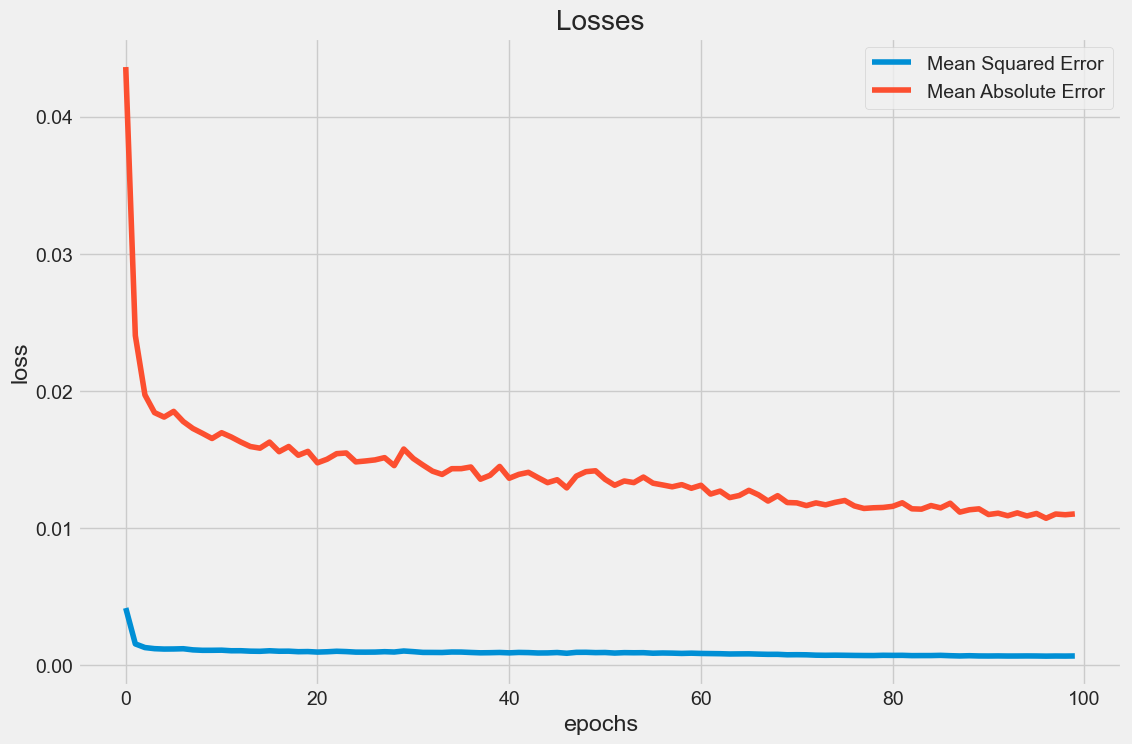

In [48]:
plt.figure(figsize=(12, 8))
plt.plot(history2.history["loss"])
plt.plot(history2.history["mean_absolute_error"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

## Prediction

### Creating testing set

In [49]:
# Creating a testing set with 60 time-steps and 1 output
time_steps = 60
test_data = scaled_data[train_size - time_steps:, :]

In [50]:
x_test = []
y_test = []
n_cols = 5

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [51]:
x_test.shape , y_test.shape

((250, 60, 5), (250, 5))

In [52]:
# Get Prediction
predictions = model2.predict(x_test)

8/8 [==============================] - 13s 298ms/step


In [53]:
#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

(250, 5)

In [54]:
#inverse y_test scaling
y_test = scaler.inverse_transform(y_test)

In [55]:
RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

3274.18